# Introduction to the Modeling and Analysis of Complex Systems
Models can be **discrete-time** or **continuous-time**. A continuous time model is represented by a standard differential equation. A discrete-time model is represented by a difference equation.

Differential equation: $\frac{dx}{dt}=F(x, t)$

Difference equation: $x_{t+1}=F(x_t, t)$

A standard differential equation that you must know is:

$$\frac{dx}{dt}=bx\implies x(t)=Ae^{bt}$$

This relationship can be stated as: If the rate of change of a value x is a constant multiple of value of x then its growth is exponential.

Sayama imagines a system in which A and B can be blue or red. A tries to be the same colour as B. B tries to be a different colour from red. The following are _state transition functions_ describing the system dynamics over time:

$$S_A(t) = S_B(t-1)$$
$$S_B(t) = S_A(t-1)$$

The state of A at any time t depends on the state of B at time t-1, and vice versa for B.

Sayam identifies the following equation types for models:

___
**Linear system**

Of the form $x=mt+c$ where m or c or both could be zero.

**Non-linear system**

Anything not of the above form, e.g. involving exponents (or roots), trig functions, etc.

___
**First-order system**

A difference equation whose rules involve the state at time t-1 only.

**Higher-order system**

Anything else (eg a system whose state at time t depends on the its state at times t-1 _and_ t-2)

___
**Autonomous**

A system whose equation doesn't include t as an explicit term. (Note that $x_t$ doesn't count as including t.)

**Non-autonomous**

A system whose equation does refer to t explicitly.

___
A system can simultaneously be classified as linear or non-linear, first-order or higher-order, autonomous or non-autonomous.

**Two important points:**

1. Non-autonomous, higher-order systems can always be converted to autonomous, first-order systems
2. Linear equations are always soluble analytically. Non-linear equations are generally not.

Example:

$$x_t=x_{t-1}+x_{t-2}$$

This is the Fibonacci sequence and it is a higher-order difference equation since it features a reference to t-2. However, if we add another state variable y such that $y=x_{t-1}$ then we can rewrite the equation as first-order.

$$x_t=x_{t-1}+y_{t-1}$$
$$y_t=x_{t-1}$$

An _analytical solution_ involves writing $x_t=f(t)$ ("closed form") such that the RHS of the equation doesn't contain any state variables (in this case x). This is useful because we can determine the state of the system x at any time t without having to know what the system was like immediately before ($x_{t-1}$). This is impossible for most non-linear systems, hence the need for simulations.

_"Linear dynamical systems can only show exponential growth/decay, periodic oscillation, stationary states (no change), or their hybrids (e.g. exponentially growing oscillation). If you observe these behaviours, you may be able to assume that the underlying rules are linear."_

# An Exponential Growth Model

Sayama breaks the model down into initialize(), update(), observe(). This is somewhat similar to the typical input(), update(), render() game loop except there is no input, since the model is not interactive, and the rendering is done right at the end. Hence the "observe()" step really means "record the state at this time step so that it can be plotted later". 


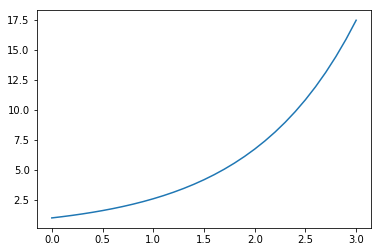

Done


In [2]:
import matplotlib.pylab as pylab

a = 1.1

def initialize():
    global x, result, t, timesteps
    x = 1
    result = [x]
    t = 0
    timesteps = [t]


def update():
    global x, result, t, timesteps
    x = a * x
    t = t + 0.1
    
def observe():
    global x, result
    result.append(x)
    timesteps.append(t)

initialize()
while t < 3:
    update()
    observe()

pylab.plot(timesteps, result)
pylab.show()

# An Oscillating Predator-Prey Model

This is not presented by Sayama (p.46) as a predator-prey model but it follows the general Lotka-Volterra pattern in which one value (y in this case) tends to increase over time (proliferation) but decreases as the other value (x in this case) increases (death by predation, hence y is the "prey"), and the other value (x) tends to decrease (starvation) but increases as the other value (y) increases (survival by successful predation, hence x is the predator).

The two plots show 

* The values of x and y over time
* The system state in an x-y phase space

The oval-shaped periodic oscillation is a typical signature of a linear system (Sayama, p.50).

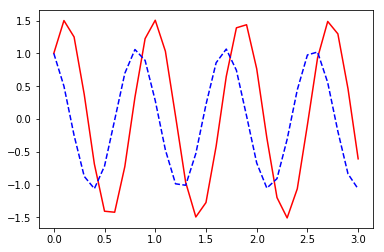

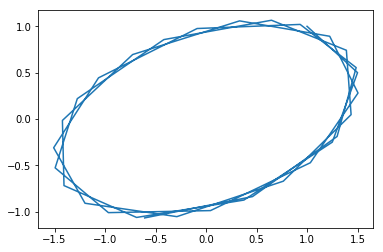

In [4]:
import matplotlib.pylab as pylab

a = 1.1

def initialize():
    global x, y, resultx, resulty, t, timesteps
    x = 1
    y = 1
    resultx = [x]
    resulty = [y]
    t = 0
    timesteps = [t]

def observe():
    global x, y, resultx, resulty, t, timesteps
    resultx.append(x)
    resulty.append(y)
    timesteps.append(t)

def update():
    # This is Lotka-Volterra with x as predator, y as prey. The populations can go below zero.
    global x, y, resultx, resulty, t, timesteps
    nextx = 0.5 * x + y
    nexty = -0.5 * x + y
    x, y = nextx, nexty
    t = t + 0.1

initialize()
while t < 3:
    update()
    observe()

fig1 = pylab.figure()
fig2 = pylab.figure()

ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)

ax1.plot(timesteps, resultx, 'r-')
ax1.plot(timesteps, resulty, 'b--')    
    
ax2.plot(resultx, resulty)
pylab.show()

Pages 52-54 give an excellent breakdown of how to build a model that demonstrates some particular set of basic behaviour. Sayama begins by suggesting that we build a model which

1. shows exponential growth
2. converges to some maximum value after which there is no growth

He gets the exponential growth simply

$$x_t=ax_{t-1}$$

He then suggests that to reach a maximum value of x there has to be a point at which the growth rate of x is equal to 1 so that $x_t=x_{t-1}$.

The growth rate function is unknown at this point so we just call it $f(x_{t-1})$. Hence the equation of our model is going to be of the form

$$x_t = f(x_{t-1})x_{t-1}$$

Thinking now only about the growth rate function $f(x_{t-1})$, it is clear the growth should be unhindered when the population is small, but equal to one when the population gets close to its maximum size (known as its _carrying capacity_), which we will refer to as K. So we can say that two points (x, f(x)) are (K, 1). It is important to realize that we are not talking about the behaviour of our model here; we are talking about the behaviour of the function that we are trying to think of that will give us the convergent behaviour of our model.

The simplest function that goes through points (0, a) and (K, 1) is a straight line $f(x)=mx+c$ where we can use the slope formula $m=\frac{y_2-y_1}{x_2-x_1}$ to find its slope and the intercept c is equal to a since the function goes through (0, a). Using the points (0, a) and (K, 1) this gives

$$f(x)=\frac{1-a}{K}x+a$$

which is more often written

$$f(x)=-\frac{a-1}{K}x+a$$

This is known as the **logistic equation**. 

# More on Predator-Prey Models

The key pattern in a predatory-prey model is that

* Left alone the prey population will increase (proliferation).
* Left alone the predatory population will decrease (starvation).
* The death rate of the prey increases as the population of the predators increases.
* The growth rate of the predators increases as the population of the prey increases.

We start by modelling the first two points only, with x as prey and y as predator:

$$x_t = x_{t-1} + r_x(r_{t-1})$$
$$y_t = y_{t-1} - d_y(y_{t-1})$$

Here $r_x$ is the growth rate of the prey and $d_y$ is the death rate of the predators.

Notice that the population of the prey x will go up and that of the predators will go down. The trouble with this model is that the growth of the prey population has no upper bound and so could proceed to infinity. We can fix this by using the **logistic growth model**, which incorporates a carrying capacity K, as before.

$$x_t = x_{t-1} + r_x(r_{t-1})({1 - x_{t-1}}/{K})$$
$$y_t = y_{t-1} - d_y(y_{t-1})$$

Now the growth rate of the prey tends to zero as the population size tends to K.

We can now add a death rate for the prey which depends on the population of predators and a growth rate of predators which depends on the population of the prey.

$$x_t = x_{t-1} + r_x(r_{t-1})({1 - x_{t-1}}/{K}) - d_x(y_{t-1}x_{t-1})$$
 
$$y_t = y_{t-1} - d_y(y_{t-1}) + r_y(x_{t-1})(y_{t-1})$$

The only thing left to do is define $d_x$ and $r_y$ in appropriate mathematical terms.

The death rate of prey, $d_x$, should be zero if there are no predators and should tend to 1 (ie a 100% death rate) as the predator population increases. This can be done with the following hyperbolic function

$$d_x = 1 - \frac{1}{by_{t-1} + 1}$$

where b determines how quickly $d_x$, the prey death rate, increases as $y$, the predator population, increases.

The growth rate of predators, $r_y$, should be zero if there are no prey but should increase indefinitely as the prey population increases. This can be done simply with

$$r_y(x) = cx$$

where $c$ can be interpreted as being related to the "nutritional value" of the prey, ie a smaller value of c means that a greater number of prey need to be consumed in order to raise the growth rate of predators by any give amount.

So our final model is:

\begin{align}
x_t = x_{t-1} + r_x(r_{t-1})(1 - x_{t-1}/K) - (1 - \frac{1}{by_{t-1} + 1})(y_{t-1}x_{t-1}) \\
y_t = y_{t-1} - d_y(y_{t-1}) + cx(x_{t-1})(y_{t-1})
\end{align}

And our parameters are:

| Parameter | Interpretation |
| :--- | :--- |
| $r_x$ | The intrinsic growth rate of prey in the absence of predators |
| $d_y$ | The intrinsic death rate of predators in the absence of prey |
| $b$ | How quickly the death rate of prey increases as the predator population of predators increases (ie the effectiveness of predators) |
| $c$ | The "nutritional value" of each prey consumed |
